In [1]:
!pip install pandas numpy matplotlib seaborn scipy scikit-learn


Defaulting to user installation because normal site-packages is not writeable


In [7]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('dataset.csv')

# Display basic information
print("\nBasic Info:")
print(df.info())


# Check for missing values before cleaning
print("\nMissing Values (Before Cleaning):")
print(df.isnull().sum())

# Fill missing numerical values with the mean and categorical values with the mode
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].mean(), inplace=True)

# Check for missing values after cleaning
print("\nMissing Values (After Cleaning):")
print(df.isnull().sum())

# Verify the cleaning
print("\nCleaned Data Info:")
print(df.info())





Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     337 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                328 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None

Missing Values (Before Cleaning):
species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64

Missing Values (After Cleaning):
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex  

In [8]:
gentoo_avg_mass = np.mean(df['body_mass_g'][df['species'] == 'Gentoo'])
print(f"Average body_mass_g for Gentoo penguins: {gentoo_avg_mass:.2f} g")


Average body_mass_g for Gentoo penguins: 5126.81 g


In [9]:
from scipy.stats import skew, kurtosis

# Assuming df is your DataFrame

# Calculate skewness and kurtosis for bill_length_mm and bill_depth_mm for each species
features = ['bill_length_mm', 'bill_depth_mm']

# Calculate skewness and kurtosis for each feature
for feature in features:
    print(f"\n{feature} Skewness and Kurtosis by Species:")
    for species in df['species'].unique():
        species_data = df[df['species'] == species][feature]
        species_skewness = skew(species_data.dropna())  # Removing NaN values before calculating
        species_kurtosis = kurtosis(species_data.dropna())  # Removing NaN values before calculating
        
        print(f"{species}: Skewness = {species_skewness:.2f}, Kurtosis = {species_kurtosis:.2f}")


bill_length_mm Skewness and Kurtosis by Species:
Adelie: Skewness = 0.16, Kurtosis = -0.23
Gentoo: Skewness = 0.71, Kurtosis = 1.15
Chinstrap: Skewness = -0.10, Kurtosis = -0.12

bill_depth_mm Skewness and Kurtosis by Species:
Adelie: Skewness = 0.33, Kurtosis = -0.10
Gentoo: Skewness = 0.33, Kurtosis = -0.61
Chinstrap: Skewness = 0.01, Kurtosis = -0.90


Number of rows before removing outliers: 344
Number of outliers detected before removal: 3

Outliers detected:
  species    island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g    sex
   Adelie Torgersen            45.8           18.9              197.0      15000.0   male
   Gentoo    Biscoe            46.5           14.4              217.0      12000.0 female
Chinstrap     Dream            51.5           18.7              187.0      10000.0   male

Number of rows after removing outliers: 341


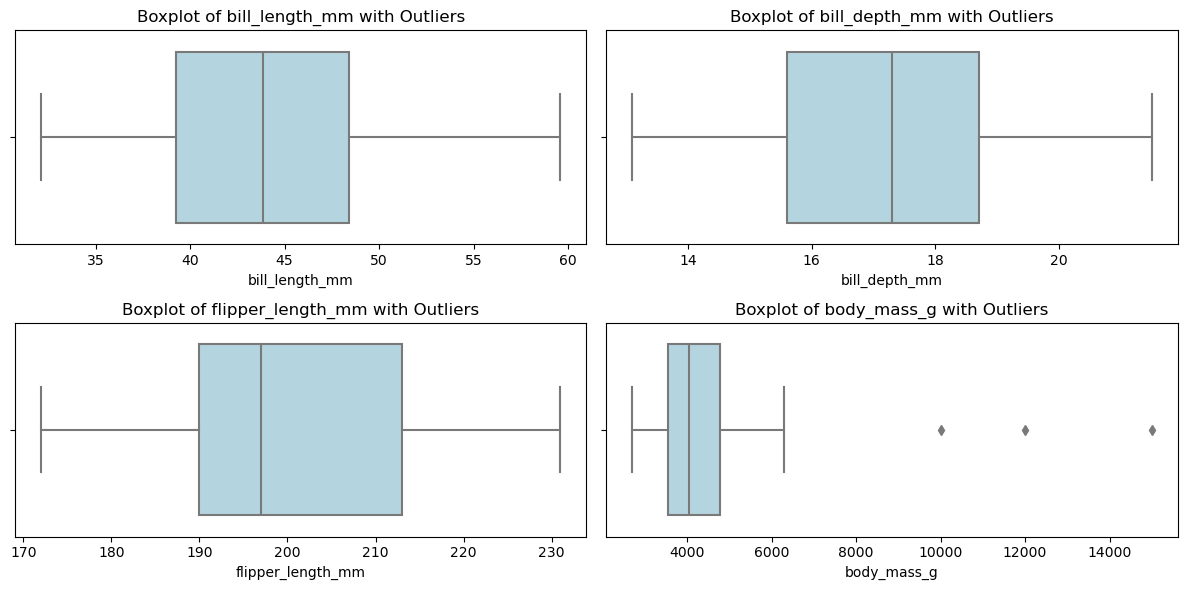

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Define the columns to check for outliers
columns_to_check = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Calculate the IQR for each column
Q1 = df[columns_to_check].quantile(0.25)
Q3 = df[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers by checking if values are outside the bounds
outliers = ((df[columns_to_check] < lower_bound) | (df[columns_to_check] > upper_bound)).any(axis=1)

# Filter the outliers
outlier_rows = df[outliers]

# Print the number of rows before outlier removal
print(f"Number of rows before removing outliers: {df.shape[0]}")

# Print the number of outliers detected before removal
print(f"Number of outliers detected before removal: {outlier_rows.shape[0]}")

# Print all the detected outliers in a single row
print("\nOutliers detected:")
outliers_str = outlier_rows.to_string(index=False)
print(outliers_str)

# Remove the outliers from the original DataFrame
df_cleaned = df[~outliers]

# Print the number of rows after removing outliers
print(f"\nNumber of rows after removing outliers: {df_cleaned.shape[0]}")

# Visualization of outliers using boxplots
plt.figure(figsize=(12, 6))

for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x=column, color='lightblue')
    plt.title(f"Boxplot of {column} with Outliers")

plt.tight_layout()
plt.show()


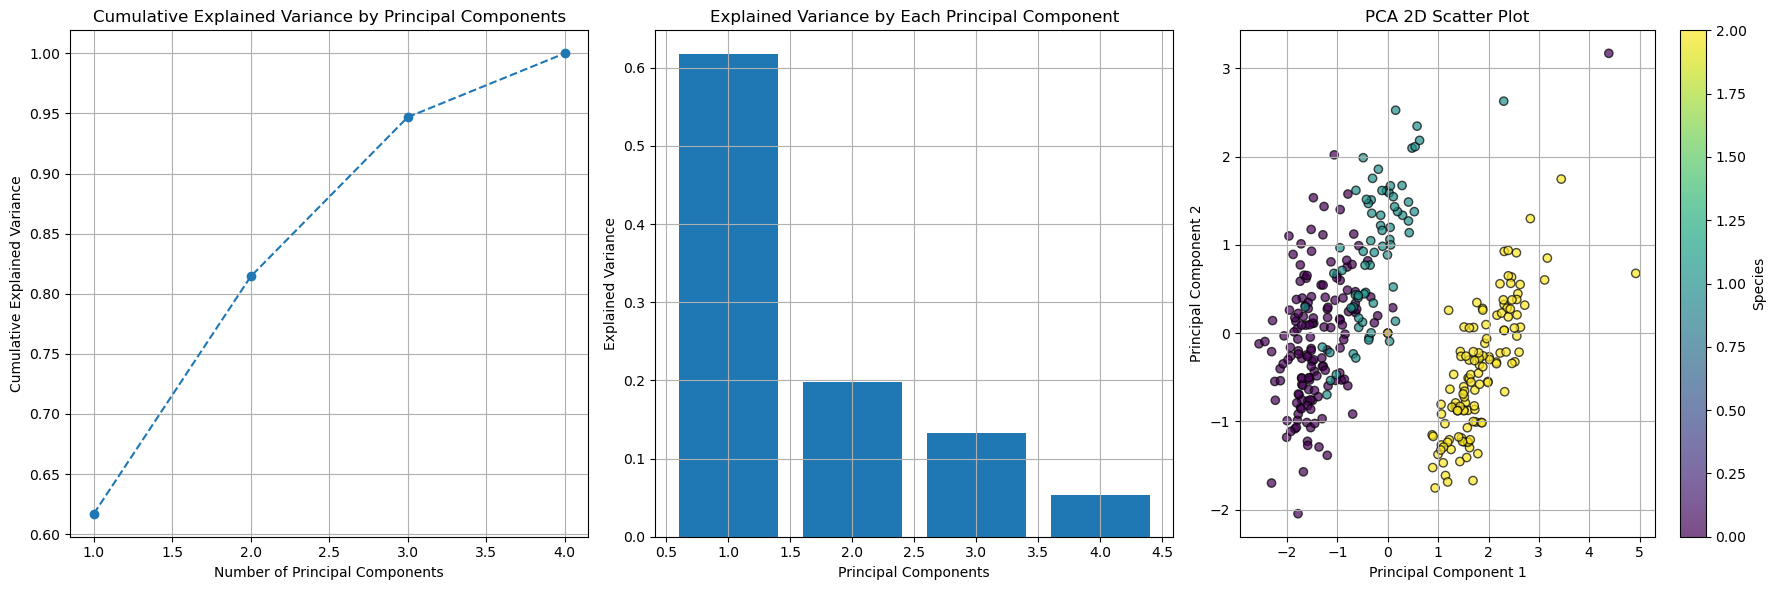

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame with relevant numerical columns
# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Cumulative Explained Variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# PCA 2D Scatter Plot (projected to the first two components)
pca_2d = pca.transform(scaled_data)

# Explained Variance Graph
explained_variance_graph = pca.explained_variance_ratio_

# Create side-by-side plots with equal size
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjusted to fit three equal-size subplots

# Plot Cumulative Explained Variance first
axes[0].plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
axes[0].set_title('Cumulative Explained Variance by Principal Components')
axes[0].set_xlabel('Number of Principal Components')
axes[0].set_ylabel('Cumulative Explained Variance')
axes[0].grid(True)

# Plot Explained Variance by Each Principal Component second
axes[1].bar(range(1, len(explained_variance_graph) + 1), explained_variance_graph)
axes[1].set_title('Explained Variance by Each Principal Component')
axes[1].set_xlabel('Principal Components')
axes[1].set_ylabel('Explained Variance')
axes[1].grid(True)

# Plot PCA 2D Scatter Plot third
scatter = axes[2].scatter(pca_2d[:, 0], pca_2d[:, 1], c=df['species'].astype('category').cat.codes, cmap='viridis', edgecolor='k', alpha=0.7)
axes[2].set_title('PCA 2D Scatter Plot')
axes[2].set_xlabel('Principal Component 1')
axes[2].set_ylabel('Principal Component 2')
axes[2].grid(True)

# Add colorbar to scatter plot
fig.colorbar(scatter, ax=axes[2], label='Species')

# Adjust layout to ensure everything fits without overlap
plt.tight_layout()
plt.show()


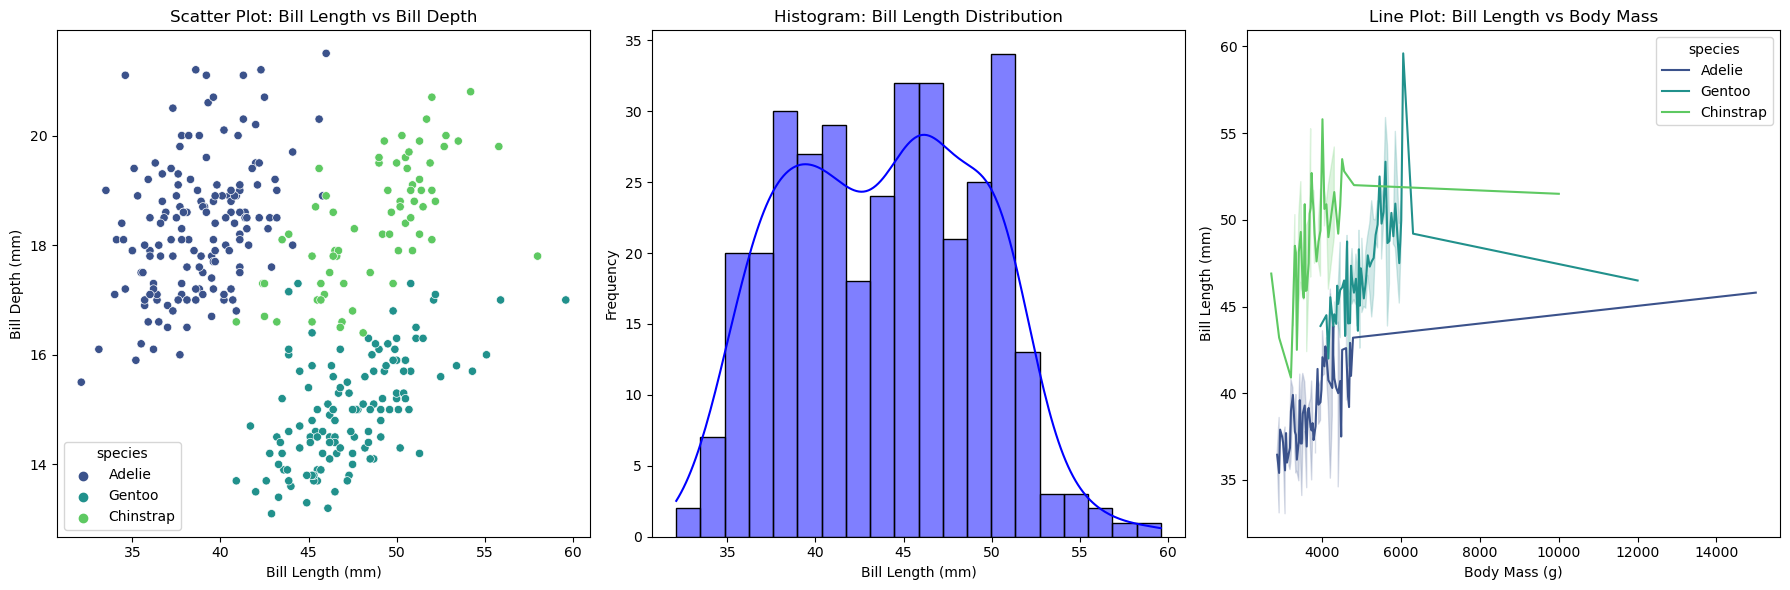

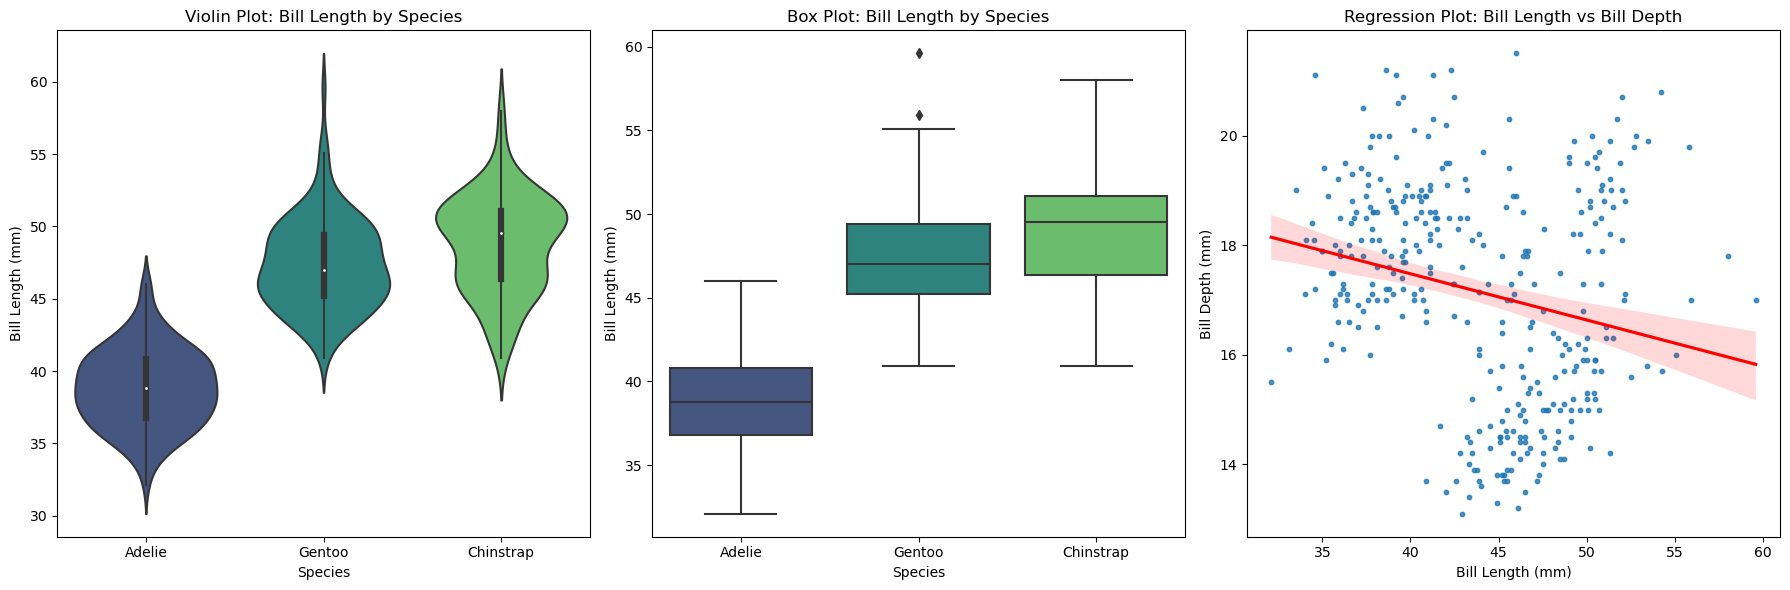

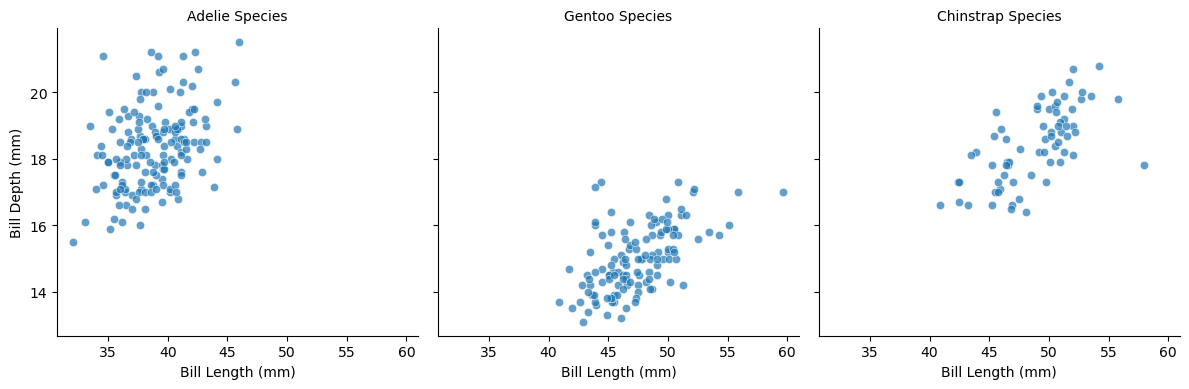

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Replace inf and -inf values with NaN in the entire DataFrame
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with any NaN values (optional, if you prefer to remove them)
df.dropna(inplace=True)

# Proceed with the plotting code
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjusted to fit three equal-size subplots

# 1. Scatter Plot
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species', palette='viridis', ax=axes[0])
axes[0].set_title('Scatter Plot: Bill Length vs Bill Depth')
axes[0].set_xlabel('Bill Length (mm)')
axes[0].set_ylabel('Bill Depth (mm)')

# 2. Histogram
sns.histplot(df['bill_length_mm'], kde=True, color='blue', bins=20, ax=axes[1])
axes[1].set_title('Histogram: Bill Length Distribution')
axes[1].set_xlabel('Bill Length (mm)')
axes[1].set_ylabel('Frequency')

# 3. Line Plot (showing trends in Bill Length over Body Mass)
sns.lineplot(data=df, x='body_mass_g', y='bill_length_mm', hue='species', palette='viridis', ax=axes[2])
axes[2].set_title('Line Plot: Bill Length vs Body Mass')
axes[2].set_xlabel('Body Mass (g)')
axes[2].set_ylabel('Bill Length (mm)')

# Adjust layout to ensure everything fits without overlap
plt.tight_layout()
plt.show()

# Create another side-by-side plot for Violin Plot, Box Plot, and Regression Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjusted to fit three equal-size subplots

# 4. Violin Plot
sns.violinplot(data=df, x='species', y='bill_length_mm', palette='viridis', ax=axes[0])
axes[0].set_title('Violin Plot: Bill Length by Species')
axes[0].set_xlabel('Species')
axes[0].set_ylabel('Bill Length (mm)')

# 5. Box Plot
sns.boxplot(data=df, x='species', y='bill_length_mm', palette='viridis', ax=axes[1])
axes[1].set_title('Box Plot: Bill Length by Species')
axes[1].set_xlabel('Species')
axes[1].set_ylabel('Bill Length (mm)')

# 6. Regression Plot (showing relationship between Bill Length and Bill Depth)
sns.regplot(data=df, x='bill_length_mm', y='bill_depth_mm', scatter_kws={'s': 10}, line_kws={'color': 'red'}, ax=axes[2])
axes[2].set_title('Regression Plot: Bill Length vs Bill Depth')
axes[2].set_xlabel('Bill Length (mm)')
axes[2].set_ylabel('Bill Depth (mm)')

# Adjust layout to ensure everything fits without overlap
plt.tight_layout()
plt.show()

# 7. FacetGrid (for visualizing different combinations based on species)
g = sns.FacetGrid(df, col="species", height=4, aspect=1)
g.map(sns.scatterplot, 'bill_length_mm', 'bill_depth_mm', alpha=0.7)
g.set_axis_labels('Bill Length (mm)', 'Bill Depth (mm)')
g.set_titles(col_template="{col_name} Species")
plt.show()


In [20]:


# Assuming 'data' is your DataFrame
# Sample data, replace with your actual dataset
data = pd.DataFrame({
    'species': ['Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo'],
    'island': ['Biscoe', 'Dream', 'Torgersen', 'Dream', 'Biscoe'],
    'flipper_length_mm': [203, 208, 210, 212, 231]
})

# Step 1: Group by species and island, and calculate the maximum flipper_length_mm for each combination
max_flipper_length = data.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()

# Step 2: Display the maximum flipper_length_mm for each combination of species and island
print("Maximum flipper_length_mm for each combination of species and island:")
print(max_flipper_length.to_string(index=False))

# Step 3: Identify the species with the longest flippers on each island
longest_flippers = max_flipper_length.loc[max_flipper_length.groupby('island')['flipper_length_mm'].idxmax()]

# Reorder the columns so island comes first, followed by species and flipper_length_mm
longest_flippers = longest_flippers[['island', 'species', 'flipper_length_mm']]

# Step 4: Display the species with the longest flippers on each island
print("\nSpecies with the longest flippers on each island:")
print(longest_flippers.to_string(index=False))



Maximum flipper_length_mm for each combination of species and island:
  species    island  flipper_length_mm
   Adelie    Biscoe                203
   Adelie     Dream                208
   Adelie Torgersen                210
Chinstrap     Dream                212
   Gentoo    Biscoe                231

Species with the longest flippers on each island:
   island   species  flipper_length_mm
   Biscoe    Gentoo                231
    Dream Chinstrap                212
Torgersen    Adelie                210


In [21]:
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your original DataFrame
# Define which columns are numeric (you can specify the column names manually or select automatically)
numeric_columns = data.select_dtypes(include=['number']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply Z-score normalization
z_score_normalized_data = scaler.fit_transform(data[numeric_columns])

# Convert the result back into a DataFrame for easy access
z_score_normalized_data = pd.DataFrame(z_score_normalized_data, columns=numeric_columns)

# Display the normalized data
print(z_score_normalized_data)

   flipper_length_mm
0          -1.023056
1          -0.501089
2          -0.292302
3          -0.083515
4           1.899961
